In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

## 1. Data Download

In [3]:
# I will start loading data for March to get to know the data set and performing first analysis. 
# I will extend the dataset to include June & November later on the study.

if os.path.exists('data_march_2017.csv'): # Check if the dataset is present on local disk and load it
    data_march = pd.read_csv('data_march_2017.csv')
else: # Download dataset if not available on disk
    url = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2017-03.csv"
    data_march = pd.read_csv(url)
    data_march.to_csv(url.split('/')[-1])

In [4]:
data = data_march

## 2. Data Exploration

In [4]:
#Let's have a look to the data
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2017-03-09 21:30:11,2017-03-09 21:44:20,1,4.06,1,N,148,48,1,14.0,0.5,0.5,3.06,0.0,0.3,18.36
1,2,2017-03-09 21:47:00,2017-03-09 21:58:01,1,2.73,1,N,48,107,2,11.5,0.5,0.5,0.00,0.0,0.3,12.80
2,2,2017-03-09 22:01:08,2017-03-09 22:11:16,1,2.27,1,N,79,162,1,10.0,0.5,0.5,2.82,0.0,0.3,14.12
3,2,2017-03-09 22:16:05,2017-03-10 06:26:11,1,3.86,1,N,237,41,1,12.0,0.5,0.5,3.99,0.0,0.3,17.29
4,2,2017-03-31 06:31:53,2017-03-31 06:41:48,1,3.45,1,N,41,162,2,12.0,0.5,0.5,0.00,0.0,0.3,13.30


In [5]:
print("The dataset contains {} taxi ride observations during March".format(data_march.shape[0]) )
print("Number of variables: ", data.shape[1])

The dataset contains 10294628 taxi ride observations during March
Number of variables:  17


In [6]:
data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.029463e+07,1.029463e+07,1.029463e+07,1.029463e+07,1.029463e+07,1.029463e+07,1.029463e+07,1.029463e+07,1.029463e+07,1.029463e+07,1.029463e+07,1.029463e+07,1.029463e+07,1.029463e+07
mean,1.542260e+00,1.618225e+00,2.884684e+00,1.042257e+00,1.628985e+02,1.607315e+02,1.328744e+00,1.291388e+01,3.408597e-01,4.973619e-01,1.857154e+00,3.104581e-01,2.996462e-01,1.622369e+01
std,4.982109e-01,1.262620e+00,3.720506e+00,5.247863e-01,6.685885e+01,7.077703e+01,4.897633e-01,5.499035e+01,4.674591e-01,7.189369e-02,2.621220e+00,1.902767e+00,1.386019e-02,5.561842e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.080000e+02,-5.371000e+01,-5.000000e-01,-9.100000e+01,-1.750000e+01,-3.000000e-01,-3.088000e+02
25%,1.000000e+00,1.000000e+00,9.400000e-01,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.400000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01,1.180000e+01
75%,2.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,2.330000e+02,2.330000e+02,2.000000e+00,1.450000e+01,5.000000e-01,5.000000e-01,2.450000e+00,0.000000e+00,3.000000e-01,1.780000e+01
max,2.000000e+00,9.000000e+00,5.985000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.718618e+05,6.980000e+01,1.033000e+02,4.254700e+02,9.235000e+02,5.000000e-01,1.718636e+05


This first description of the data helps us to locate data that needs to be cleaned up or taken care of (e.g negative fare amounts or tip amounts or 600km long distance trips). From the data dictionary we already know possible values for the different variables, threfore values outside this ranges will be cleaned out.

These data values will be cleaned in the next step:

* trip distance = 0
* Negative values for fare amount
* Negative tip amount
* Negative toll amount
* Negative improvement surchage
* Negative total amount

In [ ]:
# Missing data
for k in data:
    print(list(data[k]),data[k].isnull().sum())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Examining distribution of trips by their total distance
* Are trip distances randomly distributed? 
* Are there outliers in the distribution?

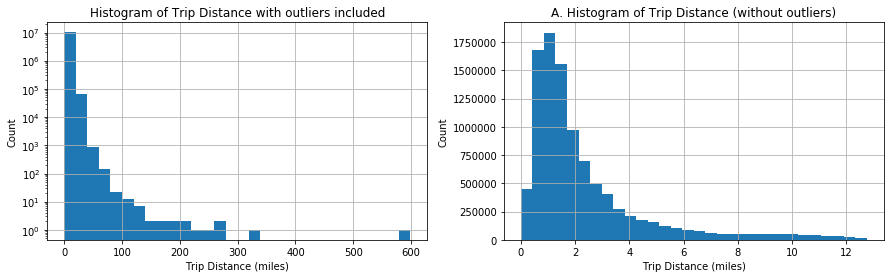

In [7]:
# define the figure with 2 subplots
fig,ax = plt.subplots(1,2,figsize = (15,4)) 

# histogram of the number of trip distance
data.trip_distance.hist(bins=30,ax=ax[0])
ax[0].set_xlabel('Trip Distance (miles)')
ax[0].set_ylabel('Count')
ax[0].set_yscale('log')
ax[0].set_title('Histogram of Trip Distance with outliers included')

# create a vector to contain Trip Distance
v = data.trip_distance 
# exclude any data point located further than 3 standard deviations of the median point and 
v[~((v-v.median()).abs()>3*v.std())].hist(bins=30,ax=ax[1]) # 
ax[1].set_xlabel('Trip Distance (miles)')
ax[1].set_ylabel('Count')
ax[1].set_title('A. Histogram of Trip Distance (without outliers)')

On the left, the distribution of the raw Trip distance is shown. On the right, outliers have been removed.
These plots show that trip distance are not random. If there were random, we would have a symmetric Gaussian distribution. They are skewed to the right showing a lognormal structure. The skewness is due to the fact that no negative values are physically possible. Raw data presents a median smaller than its mean, reflecting the presence of outliers in raw data. 

### Examining payment types 
Payment type seems, in principle, a key variable for our study. However, from the data dictionary we find that tips are only recorded when payment is done by card

Text(0.5,1,'Counts of payment type when tip was recorded')

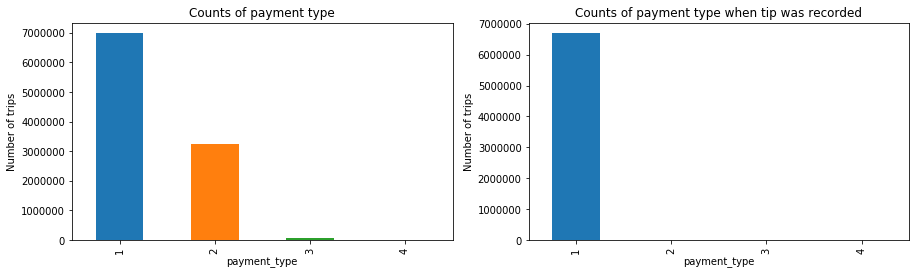

In [8]:
fig,ax = plt.subplots(1,2,figsize = (15,4)) 

# First we plot nº of taxi rides by payment type
ax[0] = data.groupby(['payment_type']).size().plot(kind='bar',ax=ax[0])
ax[0].set_xlabel('payment_type')
ax[0].set_ylabel('Number of trips')
ax[0].tick_params(labelsize=10)
ax[0].set_title('Counts of payment type')

# Then we plot nº of taxi rides by payment type when tip was recorded
ax[1] = data[(data.tip_amount > 0)].groupby(['payment_type']).size().plot(kind='bar',ax=ax[1])
ax[1].set_xlabel('payment_type')
ax[1].set_ylabel('Number of trips')
ax[1].tick_params(labelsize=10)
ax[1].set_title('Counts of payment type when tip was recorded')

Values for Payment Type 1 and 2 represent payments make by card and cash, respectively. Other values represent addional payment types that given their small number, we can ignore in this study. The main point from these plots is that we can confirm that no tips are recorded when the payment type is cash. This will have implications for the predictive model, as we will delete the payment_type attribute, because it will have only one different value.

## Data Cleaning

In [30]:
# define a function to clean a loaded dataset

def clean_data(mydata):
    """
    This function cleans the input dataframe adata:
    . drop Ehail_fee [99% transactions are NaNs]
    . impute missing values in Trip_type
    . replace invalid data by most frequent value for RateCodeID and Extra
    . encode categorical to numeric
    . rename pickup and dropff time variables (for later use)
    
    input:
        adata: pandas.dataframe
    output: 
        pandas.dataframe

    """
    ## make a copy of the input
    data = mydata.copy()
    
    ##  replace missing values in Trip_type with the most frequent value 1
    data['Trip_type '] = data['Trip_type '].replace(np.NaN,1)
    
    ## replace all values that are not allowed as per the variable dictionary with the most frequent allowable value
    # remove negative values from Total amound and Fare_amount
    print("Negative values found and replaced by their abs")
    print("Total_amount", 100*data[data.Total_amount<0].shape[0]/float(data.shape[0]),"%")
    print("Fare_amount", 100*data[data.Fare_amount<0].shape[0]/float(data.shape[0]),"%")
    print("Improvement_surcharge", 100*data[data.improvement_surcharge<0].shape[0]/float(data.shape[0]),"%")
    print("Tip_amount", 100*data[data.Tip_amount<0].shape[0]/float(data.shape[0]),"%")
    print("Tolls_amount", 100*data[data.Tolls_amount<0].shape[0]/float(data.shape[0]),"%")
    print("MTA_tax", 100*data[data.MTA_tax<0].shape[0]/float(data.shape[0]),"%")
    data.Total_amount = data.Total_amount.abs()
    data.Fare_amount = data.Fare_amount.abs()
    data.improvement_surcharge = data.improvement_surcharge.abs()
    data.Tip_amount = data.Tip_amount.abs()
    data.Tolls_amount = data.Tolls_amount.abs()
    data.MTA_tax = data.MTA_tax.abs()
    
    # RateCodeID
    indices_oi = data[~((data.RateCodeID>=1) & (data.RateCodeID<=6))].index
    data.loc[indices_oi, 'RateCodeID'] = 2 # 2 = Cash payment was identified as the common method
    print(round(100*len(indices_oi)/float(data.shape[0]),2),"% of values in RateCodeID were invalid.--> Replaced by the most frequent 2"
         )
    # Extra
    indices_oi = data[~((data.Extra==0) | (data.Extra==0.5) | (data.Extra==1))].index
    data.loc[indices_oi, 'Extra'] = 0 # 0 was identified as the most frequent value
    print(round(100*len(indices_oi)/float(data.shape[0]),2),"% of values in Extra were invalid.--> Replaced by the most frequent 0"
         )
    # Total_amount: the minimum charge is 2.5, so I will replace every thing less than 2.5 by the median 11.76 (pre-obtained in analysis)
    indices_oi = data[(data.Total_amount<2.5)].index
    data.loc[indices_oi,'Total_amount'] = 11.76
    print(round(100*len(indices_oi)/float(data.shape[0]),2),"% of values in total amount worth <$2.5.--> Replaced by the median 1.76"
         )
    # encode categorical to numeric (I avoid to use dummy to keep dataset small)
    if data.Store_and_fwd_flag.dtype.name != 'int64':
        data['Store_and_fwd_flag'] = (data.Store_and_fwd_flag=='Y')*1
    
    # rename time stamp variables and convert them to the right format
    print("renaming variables...")
    data.rename(columns={'lpep_pickup_datetime':'Pickup_dt','Lpep_dropoff_datetime':'Dropoff_dt'},inplace=True)
    print("converting timestamps variables to right format ...")
    data['Pickup_dt'] = data.Pickup_dt.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
    data['Dropoff_dt'] = data.Dropoff_dt.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
    
    print "Done cleaning"
    return data

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 116)